In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.style.use('seaborn-v0_8')
np.random.seed(3432)

In [2]:
%matplotlib widget

In [3]:
class GradientDescent:
    
    def gradient_descent(self, func, n_vars, n_iter=20, alpha=0.01, tol=1e-6):
        x_ni = []  # List to store intermediate values of x during iterations
        x_n = np.random.normal(loc=0, scale=2, size=n_vars)  # Initialize x randomly
        x_ni.append(x_n)  # Store the initial value of x
        
        for i in range(n_iter):
            grad = self.compute_gradient(func, x_n, n_vars)  # Calculate gradient of the function
            x_n_new = x_n - alpha * grad  # Update x using gradient and learning rate
            x_ni.append(x_n_new)  # Store the new value of x
            
            if np.linalg.norm(x_n_new - x_n) < tol:  # Check for convergence using tolerance
                break
                
            x_n = x_n_new  # Update x for the next iteration
            
        return np.array(x_ni)  # Return the array of intermediate x values
        
    def compute_gradient(self, func, x, n_vars):
        h = 1e-6  # Small value for numerical gradient calculation
        grad = np.zeros(n_vars)  # Initialize gradient array
        
        for i in range(n_vars):
            x_h = self.sum_h(x, i, h)  # Add small increment to the ith component of x
            grad[i] = (func(x_h) - func(x)) / h  # Calculate numerical gradient
            
        return grad  # Return the gradient vector
    
    def sum_h(self, array, i, h):
        arr = array.copy()  # Create a copy of the input array
        arr[i] += h  # Add small increment to the ith component
        return arr  # Return the modified array with the increment

# $f(x,y)={x}^{2}+{y}^{2}+x\sin{y}+y\sin{x}$

In [4]:
f1 = lambda x : x[0]**2 +  x[1]**2 + x[0] * np.sin(x[1]) + x[1] * np.sin(x[0])

In [5]:
x = np.linspace(-5, 5, 400)
y = np.linspace(-5, 5, 400) 
X = np.meshgrid(x, y)
Z = f1(X)

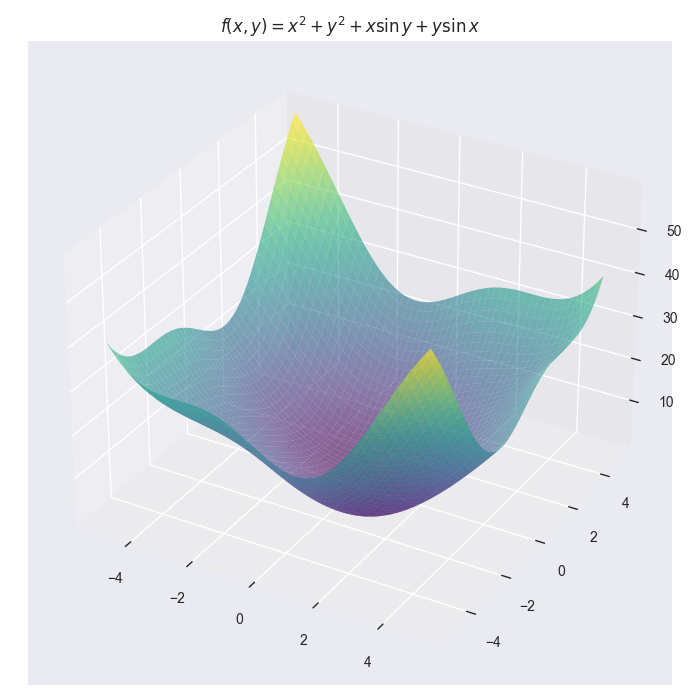

In [6]:
fig, axs = plt.subplots(subplot_kw={"projection": "3d"}, figsize = (7,7))
surf = axs.plot_surface(X[0], X[1], Z, cmap='viridis',
                       linewidth=1, antialiased=True, alpha = 0.6)
axs.set_title('$f(x,y)={x}^{2}+{y}^{2}+x\sin{y}+y\sin{x}$')
fig.tight_layout()
plt.show()
fig.savefig('./images/f1surf.png')

In [7]:
gd = GradientDescent()
min = gd.gradient_descent(f1, 2, n_iter=20, alpha=0.2)

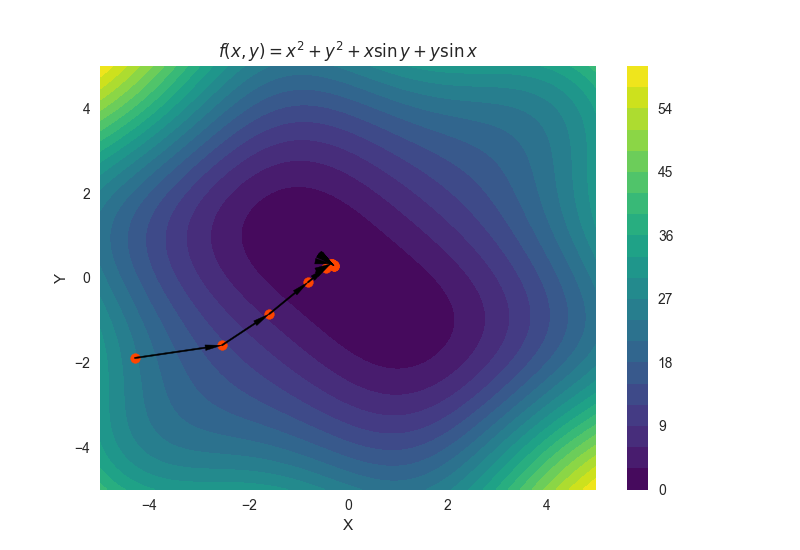

In [8]:
fig1, ax1 = plt.subplots()
contour = ax1.contourf(X[0],X[1] , Z, levels=20, cmap='viridis')
ax1.scatter(min[:,0], min[:,1], color = 'orangered', marker = 'o')
for i in range(min.shape[0] - 1):
    ax1.annotate('', xy = (min[i + 1, 0], min[i + 1,1]), xytext = (min[i, 0], min[i, 1]), arrowprops = dict(width = 1, headwidth = 4, facecolor = 'black'))
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.grid(False)
ax1.set_title('$f(x,y)={x}^{2}+{y}^{2}+x\sin{y}+y\sin{x}$')
fig1.colorbar(contour, ax=ax1)
plt.show()
fig1.savefig('./images/gdf1surf.png')

MovieWriter ffmpeg unavailable; using Pillow instead.


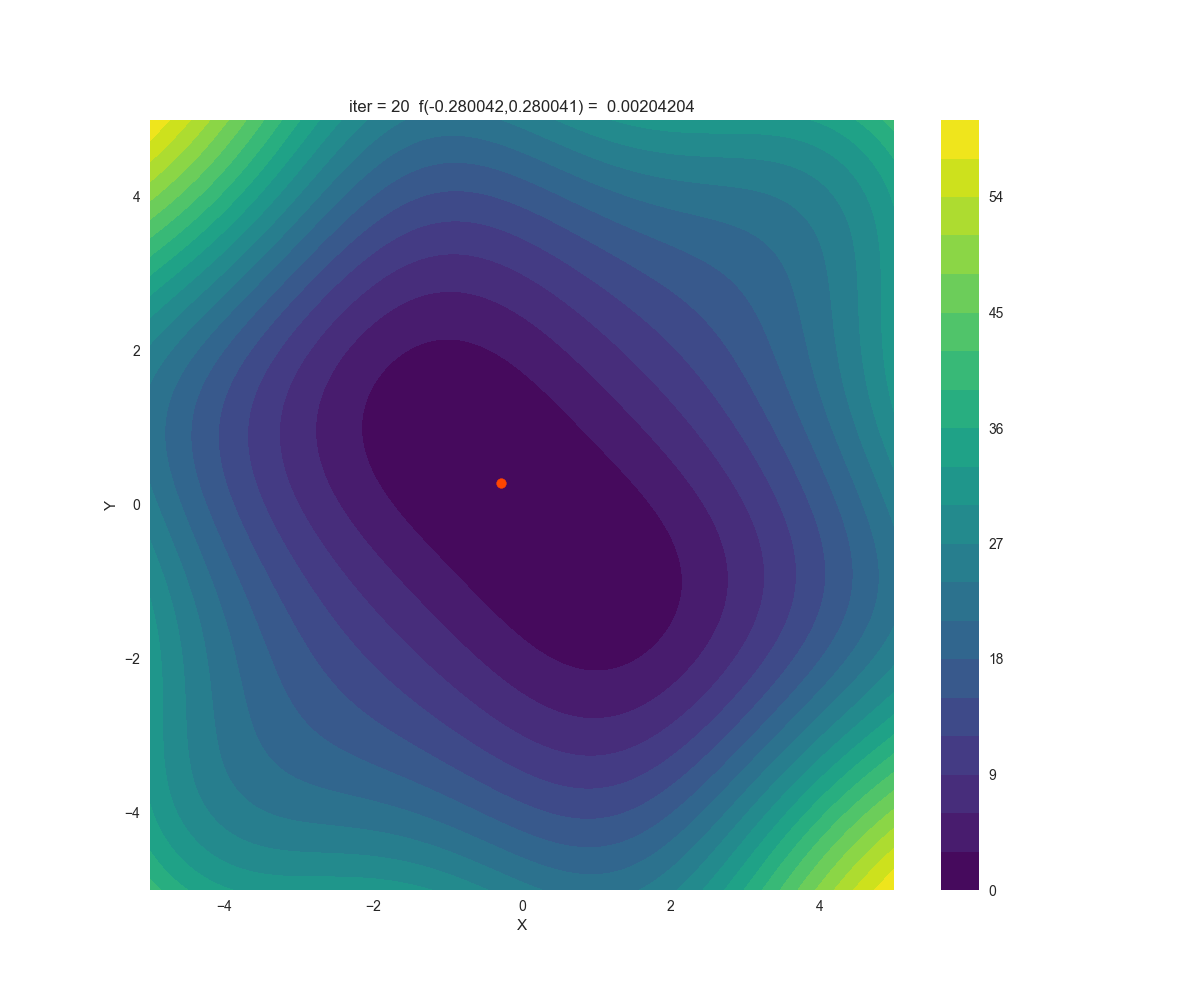

In [9]:
fig, ax = plt.subplots(figsize=(12,10))
contour = ax.contourf(X[0],X[1] , Z, levels=20, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.grid(False)
scat = ax.scatter([], [], color = 'orangered')
fig.colorbar(contour, ax=ax)
def animate(i):
    scat.set_offsets((min[i, 0], min[i, 1]))
    ax.set_title(f'iter = {i}  f({min[i,0]:.6f},{min[i,1]:.6f}) = {f1(min[i]): .8f}')
    return scat,

ani = animation.FuncAnimation(fig, animate, repeat=True, frames=min.shape[0], interval=500)
ani.save('./images/gradf1.gif')
plt.show()

# $f(x,y)={({x}^{2} + y - 11)}^{2} + {(x +{y}^{2} - 7)}^{2}$

In [10]:
f2 = lambda x : (x[0] ** 2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

In [11]:
x = np.linspace(-5, 5, 400)
y = np.linspace(-5, 5, 400) 
X = np.meshgrid(x, y)
Z = f2(X)

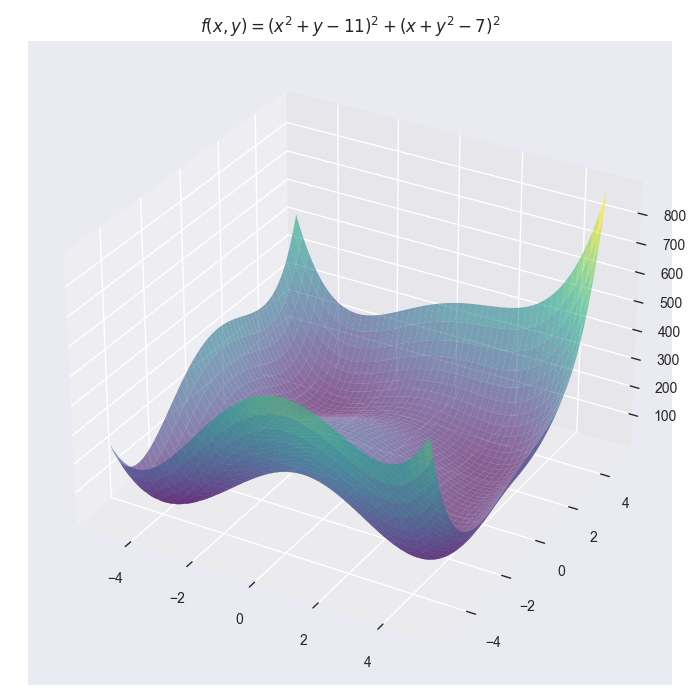

In [12]:
fig, ax2 = plt.subplots(subplot_kw={"projection": "3d"}, figsize = (7,7))
surf = ax2.plot_surface(X[0], X[1], Z, cmap='viridis',
                       linewidth=1, antialiased=True, alpha = 0.6)
ax2.set_title('$f(x,y)={({x}^{2} + y - 11)}^{2} + {(x +{y}^{2} - 7)}^{2}$')
fig.tight_layout()
plt.show()
fig.savefig('./images/f2surf.png')

In [13]:
min = gd.gradient_descent(f2, 2, n_iter=20, alpha=0.01)

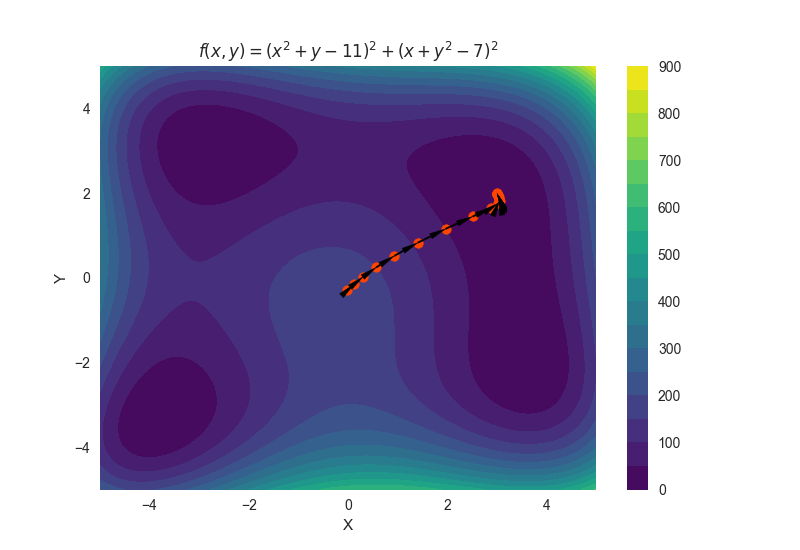

In [14]:
fig3, ax3 = plt.subplots()
contour = ax3.contourf(X[0],X[1] , Z, levels=20, cmap='viridis')
ax3.scatter(min[:,0], min[:,1], color = 'orangered', marker = 'o')
for i in range(min.shape[0] - 1):
    ax3.annotate('', xy = (min[i + 1, 0], min[i + 1,1]), xytext = (min[i, 0], min[i, 1]), arrowprops = dict(width = 1, headwidth = 4, facecolor = 'black'))
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.grid(False)
ax3.set_title('$f(x,y)={({x}^{2} + y - 11)}^{2} + {(x +{y}^{2} - 7)}^{2}$')
fig3.colorbar(contour, ax=ax3)
plt.show()
fig3.savefig('./images/gdf2surf.png')

MovieWriter ffmpeg unavailable; using Pillow instead.


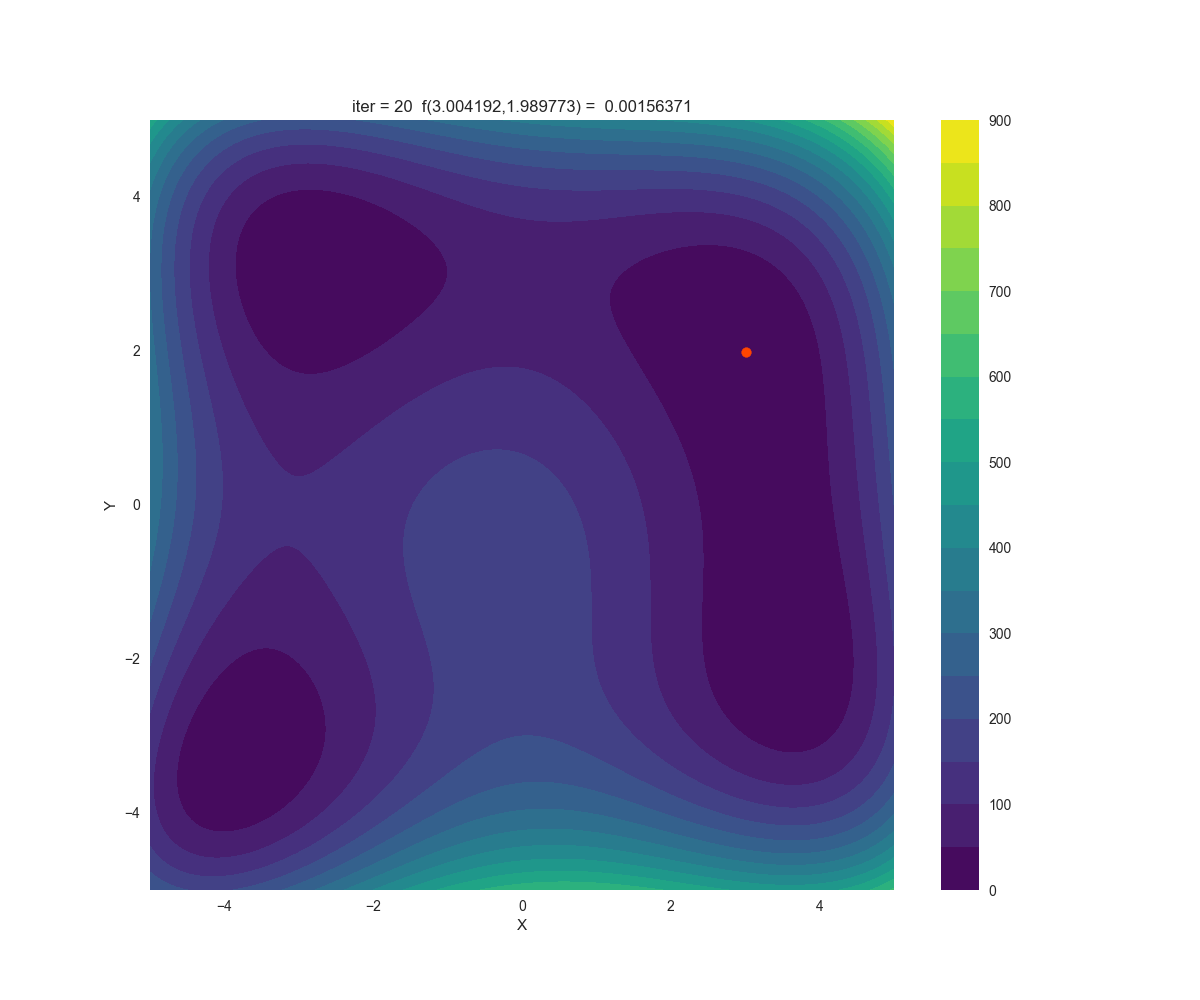

In [15]:
fig, ax4 = plt.subplots(figsize=(12,10))
contour = ax4.contourf(X[0],X[1] , Z, levels=20, cmap='viridis')
ax4.set_xlabel('X')
ax4.set_ylabel('Y')
ax4.grid(False)
scat = ax4.scatter([], [], color = 'orangered')
fig.colorbar(contour, ax=ax4)

def animate(i):
    scat.set_offsets((min[i, 0], min[i, 1]))
    ax4.set_title(f'iter = {i}  f({min[i,0]:.6f},{min[i,1]:.6f}) = {f2(min[i]): .8f}')
    return scat,


ani = animation.FuncAnimation(fig, animate, repeat=True, frames=min.shape[0], interval=500)
ani.save('./images/gradf2.gif')
plt.show()